#SCC - 275 CIENCIA DE DADOS
##PROFa. Roseli A F Romero
####PAE: Guilherme Nardari
#####2o. semestre de 2020

# Exercício 02
## Exploração e visualização de dados
### Alunos:


- João Marco Oliveira Barros - 10351992
- Leandro Giusti Mugnaini - 10260351
- Matheus Borges Kamla - 10277015

## Dados unidimensionais
 

In [ ]:
# Permissão de leitura para o Drive
# Autorize o Collab a acessar seus arquivos no drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Suponha que duas cidades diferentes tenham te fornecido as temperaturas máximas (celsius) durante diferente dias do ano.
Os dados foram disponibilizados nos arquivos "cidade_1.txt" e "cidade_2.txt".

As leituras estão em ordem cronológica, porém, o sensor da cidade 1 falhou em alguns dias. Nesses casos, a leitura foi substituida pelo o caracter "?".

### Questão 0
- Substitua os valores faltantes pela média das leituras do dia anterior e do dia seguinte.

In [ ]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
import seaborn as sns

# leia o arquivo da cidade 1
with open("/content/drive/My Drive/Colab Notebooks/Tarefa 2 - Ciência de Dados/cidade_1.txt") as f:
    cidade_1_lines = f.readlines()
for i in range(0,len(cidade_1_lines)):
  if cidade_1_lines[i] == "?\n":
    cidade_1_lines[i] = (float(cidade_1_lines[i-1])+float(cidade_1_lines[i+1]))/2
cidade_1 = np.array([float(x) for x in cidade_1_lines])

# lendo arquivo da cidade 2
with open("/content/drive/My Drive/Colab Notebooks/Tarefa 2 - Ciência de Dados/cidade_2.txt") as f:
    cidade_2_lines = f.readlines()
cidade_2 = np.array([float(x) for x in cidade_2_lines])

### Questão 01. 
Consideramos um dia como quente caso sua temperatura máxima tenha sido maior ou igual 25 graus celsius.

Calcule a média de temperatura no ano para cada cidade.

Demonstre visualmente o porque essa métrica não é uma boa forma de estimarmos qual cidade teve mais dias quente.

   - Dica: Transforme os arrays de cada cidade em estruturas do tipo `DataFrame` da biblioteca **pandas** e utilize as funções de histograma e/ou boxplot.

24.012638726623994
27.82079587783114


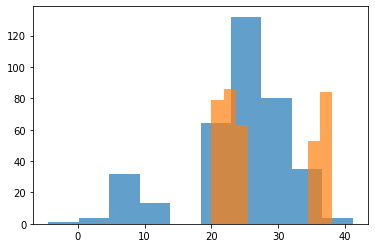

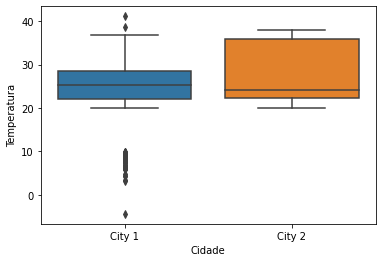

In [ ]:
#media de temperatura cidade 1
media_cidade_1 = cidade_1.mean()
df1 = pd.DataFrame({'Temperatura': cidade_1})
print(media_cidade_1)

#media de temperatura cidade 2
media_cidade_2 = cidade_2.mean()
df2 = pd.DataFrame({'Temperatura': cidade_2})
print(media_cidade_2)


#Histogramas
plt.hist(cidade_1, alpha = 0.7)
plt.hist(cidade_2, alpha = 0.7)
plt.show()

#Boxplot
temperaturas = np.concatenate((cidade_1, cidade_2))
classes = len(cidade_1)*['City 1'] + len(cidade_2)*['City 2']
df = pd.DataFrame({'Temperatura': temperaturas, 'Cidade': classes})
sns.boxplot(x="Cidade", y="Temperatura", data=df)


Apesar da média de temperaturas da cidade 2 (laranja) ser maior do que a média de temperaturas da cidade 1 (azul), poucos dias da cidade 2 foram responsáveis por aumentar a média da temperatura, não representando que durante o ano todo a temperatura foi elevada, e sim durante apenas um período do ano. É possível observar a diferença da área dos histogramas na faixa dos 25 à 40 graus Celsius, sendo a área azul (cidade 1), bem maior do que a área laranja (cidade 2). 

No gráfico boxplot, podemos observar que a temperatura na cidade 1 não teve uma alta variância ao passar dos dias do ano, enquanto a cidade 2 teve uma alta variância de temperatura. 



---

### Questão 02.
Calcule o número de dias quentes em cada cidade.
- Dica: Use a função `argwhere` da biblioteca **numpy**.

In [ ]:
# seu codigo aqui
#Dias quentes cidade 1
dias_quentes_1 = np.argwhere(cidade_1>=25)
print("Dias quentes cidade 1:" , len(dias_quentes_1))

#Dias quentes cidade 2
dias_quentes_2 = np.argwhere(cidade_2>=25)
print("Dias quentes cidade 2:" , len(dias_quentes_2))


Dias quentes cidade 1: 192
Dias quentes cidade 2: 137


## Dados multidimensionais

Considere o conjunto de dados dos jogadores de futebol utilizado no Exercício 1, com as transformações feitas anteriormente.

- Dica: Você pode utilizar a função [**to_csv**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) para salvar o DataFrame do exercício anterior e carregá-lo neste notebook.



In [ ]:
# Leia sua base de dados
players = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Tarefa 2 - Ciência de Dados/jogadores.csv")
players

,Unnamed: 0,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age
0,0,530,167285,Alireza Haghighi,191589,1988-05-02 00:00:00,1.9304,79.832257,32
1,1,8608,184536,Philippe Coutinho,189242,1992-06-12 00:00:00,1.7018,68.038856,28
2,2,7752,38947,Mustapha Jarju Alasan,178374,1986-07-18 00:00:00,1.8288,81.193034,34
3,3,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,1.8034,69.853225,41
4,4,8427,27613,Paulinho,164256,1986-01-10 00:00:00,1.7526,72.121187,34
...,...,...,...,...,...,...,...,...,...
345,345,10199,7627,Thierno Bah,45269,1982-10-05 00:00:00,1.7526,68.038856,37
346,346,1216,246330,Benjamin Morel,202753,1987-06-10 00:00:00,1.8034,69.853225,33
347,347,4262,33793,Hugo Alcantara,14491,1979-07-28 00:00:00,1.9050,84.821773,41
348,348,5886,173699,Koro Kone,207538,1989-07-05 00:00:00,1.7780,74.842741,31




---


### Questão 03.

Calcule os quatro momentos (média, variância, obliquidade e achatamento) para cada atributo do conjunto.

  - Dica: Você pode utilizar as bibliotecas **numpy** para média (mean) e variância (variance) e **Scipy** para obliquidade (skew) e achatamento (kurtosis).

In [ ]:
#Média
media_altura = players['height'].mean()
media_peso = players['weight'].mean()
media_idade = players['age'].mean()
print("Média de altura é:", media_altura, "\n","Média de peso é:", media_peso, "\n","Média de idade é:", media_idade)

print("\n\n")

var_altura = players['height'].var()
var_peso = players['weight'].var()
var_idade = players['age'].var()
print("Variância de altura é:", var_altura, "\n","Variância de peso é:", var_peso, "\n","Variância de idade é:", var_idade)

print("\n\n")

obliq_altura = players['height'].skew()
obliq_peso = players['weight'].skew()
obliq_idade = players['age'].skew()
print("Obliquidade de altura é:", obliq_altura, "\n","Obliquidade de peso é:", obliq_peso, "\n","Obliquidade de idade é:", obliq_idade)

print("\n\n")

kurt_altura = players['height'].kurtosis()
kurt_peso = players['weight'].kurtosis()
kurt_idade = players['age'].kurtosis()
print("Achatamento de altura é:", kurt_altura, "\n","Achatamento de peso é:", kurt_peso, "\n","Achatamento de idade é:", kurt_idade)



Média de altura é: 1.820163999999998 
 Média de peso é: 76.4549379308001 
 Média de idade é: 33.35142857142857



Variância de altura é: 0.0036686126830945656 
 Variância de peso é: 41.281538625172274 
 Variância de idade é: 26.526573884568148



Obliquidade de altura é: -0.12007981638318897 
 Obliquidade de peso é: 0.03027696608291285 
 Obliquidade de idade é: 0.2983304668360165



Achatamento de altura é: -0.4321787984728007 
 Achatamento de peso é: -0.10866518706788009 
 Achatamento de idade é: -0.3423091453995184




---

### Questão 04.

Calcule o boxplot de cada atributo do conjunto. Analise se os dados estão centrados (simetria) e estime qual intervalo contém 50% dos dados (intervalo entre primeiro e terceiro quartil).


count    350.000000
mean       1.820164
std        0.060569
min        1.651000
25%        1.778000
50%        1.828800
75%        1.854200
max        1.981200
Name: height, dtype: float64

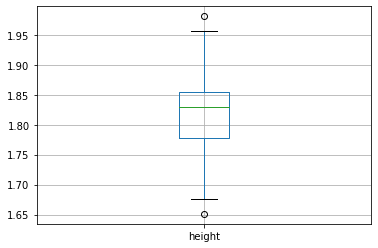

In [ ]:
#Boxplot e análise da altura
boxplot_height = players.boxplot(column='height')
players['height'].describe()


No caso da altura, os dados não estão centrados, pois a mediana (medida de 50% - 1.8288) está deslocada da média (1.8201). O intervalo de altura entre 1.7780 e 1.8542 possui 50% dos dados. 

count    350.000000
mean      76.454938
std        6.425071
min       58.967008
25%       72.121187
50%       76.203518
75%       81.193034
max       96.161582
Name: weight, dtype: float64

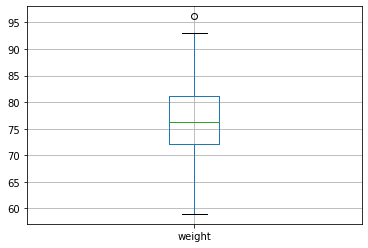

In [ ]:
#Boxplot e análise do peso
boxplot_weight = players.boxplot(column='weight')
players['weight'].describe()

Neste caso pode-se considerar que os dados estão centrados pois a diferença percentual entre a média e a mediana é baixa. 50% dos dados estão no intervalo de peso de 72.121187 e 81.193034.

count    350.000000
mean      33.351429
std        5.150396
min       21.000000
25%       30.000000
50%       33.000000
75%       37.000000
max       48.000000
Name: age, dtype: float64

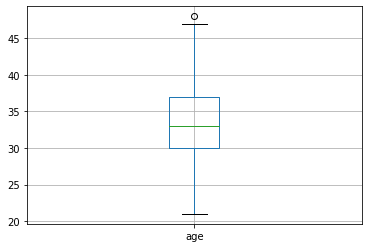

In [ ]:
#Boxplot e análise da idade
boxplot_age = players.boxplot(column='age')
players['age'].describe()

Como os valores da média e mediana são aproximados, podemos considerar que os dados estão centrados. 50% dos dados estão no intervalo de idade de 30 a 37 anos. 

### Questão 05.
O arquivo **player_attributes.csv** contém mais informações sobre os jogadores. Leia-o como DataFrame e combine suas informações com o DataFrame já existente.

Caso um atributo não esteja disponível para algum jogador, substitua o valor NaN pela média ou valor mais comum para aquele atributo.

- Dica: Utilize a função [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) para combinar dois DataFrames que contém ao menos um atributo em comum

- Dica 2: Ambos DataFrames possuem o atributo "player_api_id"

In [ ]:
# Seu código aqui
players_novo = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Tarefa 2 - Ciência de Dados/player_attributes.csv")
jogadores = players.merge(players_novo, how='right', on='player_api_id')
jogadores.apply(lambda x:x.fillna(x.mode()[0], axis=0, inplace=True))
jogadores

,Unnamed: 0_x,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,age,Unnamed: 0_y,id_y,player_fifa_api_id_y,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0,530,167285,Alireza Haghighi,191589,1988-05-02 00:00:00,1.9304,79.832257,32,8956,8957,191589,2016-05-05 00:00:00,66.0,66.0,left,medium,medium,20.0,14.0,21.0,23.0,24.0,14.0,16.0,15.0,24.0,12.0,32.0,37.0,50.0,75.0,56.0,17.0,63.0,19.0,66.0,20.0,42.0,25.0,11.0,42.0,18.0,16.0,21.0,13.0,68.0,59.0,56.0,64.0,72.0
1,1,8608,184536,Philippe Coutinho,189242,1992-06-12 00:00:00,1.7018,68.038856,28,143341,143342,189242,2016-04-14 00:00:00,84.0,88.0,right,high,medium,74.0,70.0,47.0,85.0,75.0,87.0,84.0,72.0,78.0,88.0,89.0,77.0,91.0,75.0,91.0,79.0,59.0,73.0,56.0,80.0,35.0,30.0,76.0,87.0,64.0,24.0,38.0,35.0,12.0,7.0,9.0,14.0,6.0
2,2,7752,38947,Mustapha Jarju Alasan,178374,1986-07-18 00:00:00,1.8288,81.193034,34,129446,129447,178374,2014-03-28 00:00:00,67.0,70.0,right,medium,low,50.0,67.0,56.0,64.0,69.0,67.0,64.0,69.0,41.0,68.0,77.0,71.0,78.0,66.0,60.0,75.0,72.0,64.0,67.0,68.0,54.0,28.0,66.0,65.0,71.0,39.0,28.0,26.0,8.0,13.0,13.0,9.0,13.0
3,3,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,1.8034,69.853225,41,183953,183954,111191,2011-02-22 00:00:00,68.0,73.0,left,NaN,_0,64.0,38.0,71.0,66.0,57.0,65.0,60.0,44.0,60.0,67.0,71.0,73.0,59.0,69.0,72.0,59.0,42.0,70.0,68.0,53.0,78.0,64.0,58.0,66.0,61.0,67.0,71.0,59.0,15.0,13.0,5.0,6.0,6.0
4,4,8427,27613,Paulinho,164256,1986-01-10 00:00:00,1.7526,72.121187,34,140662,140663,164256,2014-05-16 00:00:00,76.0,76.0,right,high,low,62.0,79.0,70.0,75.0,65.0,76.0,73.0,74.0,64.0,78.0,79.0,83.0,85.0,78.0,71.0,74.0,80.0,77.0,76.0,69.0,42.0,25.0,79.0,77.0,75.0,25.0,25.0,25.0,11.0,5.0,6.0,9.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,345,10199,7627,Thierno Bah,45269,1982-10-05 00:00:00,1.7526,68.038856,37,169953,169954,45269,2013-02-15 00:00:00,63.0,63.0,right,low,medium,60.0,43.0,68.0,68.0,52.0,63.0,46.0,65.0,64.0,60.0,77.0,69.0,80.0,61.0,74.0,63.0,84.0,77.0,80.0,68.0,73.0,55.0,57.0,43.0,36.0,64.0,62.0,58.0,7.0,6.0,13.0,7.0,6.0
346,346,1216,246330,Benjamin Morel,202753,1987-06-10 00:00:00,1.8034,69.853225,33,20654,20655,202753,2012-02-22 00:00:00,61.0,66.0,right,medium,medium,56.0,66.0,63.0,60.0,58.0,60.0,62.0,43.0,58.0,63.0,70.0,64.0,59.0,57.0,60.0,63.0,65.0,63.0,64.0,59.0,63.0,23.0,59.0,56.0,63.0,23.0,15.0,16.0,9.0,15.0,7.0,10.0,15.0
347,347,4262,33793,Hugo Alcantara,14491,1979-07-28 00:00:00,1.9050,84.821773,41,70927,70928,14491,2012-02-22 00:00:00,66.0,66.0,left,medium,medium,43.0,36.0,69.0,54.0,44.0,58.0,68.0,58.0,64.0,55.0,34.0,32.0,55.0,63.0,36.0,65.0,49.0,64.0,77.0,47.0,72.0,73.0,35.0,55.0,52.0,65.0,70.0,61.0,14.0,5.0,8.0,9.0,8.0
348,348,5886,173699,Koro Kone,207538,1989-07-05 00:00:00,1.7780,74.842741,31,97707,97708,207538,2015-07-03 00:00:00,63.0,66.0,right,medium,low,43.0,63.0,71.0,54.0,60.0,70.0,56.0,52.0,45.0,55.0,76.0,80.0,79.0,72.0,75.0,64.0,49.0,56.0,65.0,52.0,31.0,27.0,47.0,55.0,65.0,22.0,25.0,25.0,12.0,11.0,8.0,13.0,9.0
